<a href="https://colab.research.google.com/github/DiegoAunta/EFM---Efecto-Fotoelectrico/blob/main/Simul2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Parte I: distribución exponencial

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random

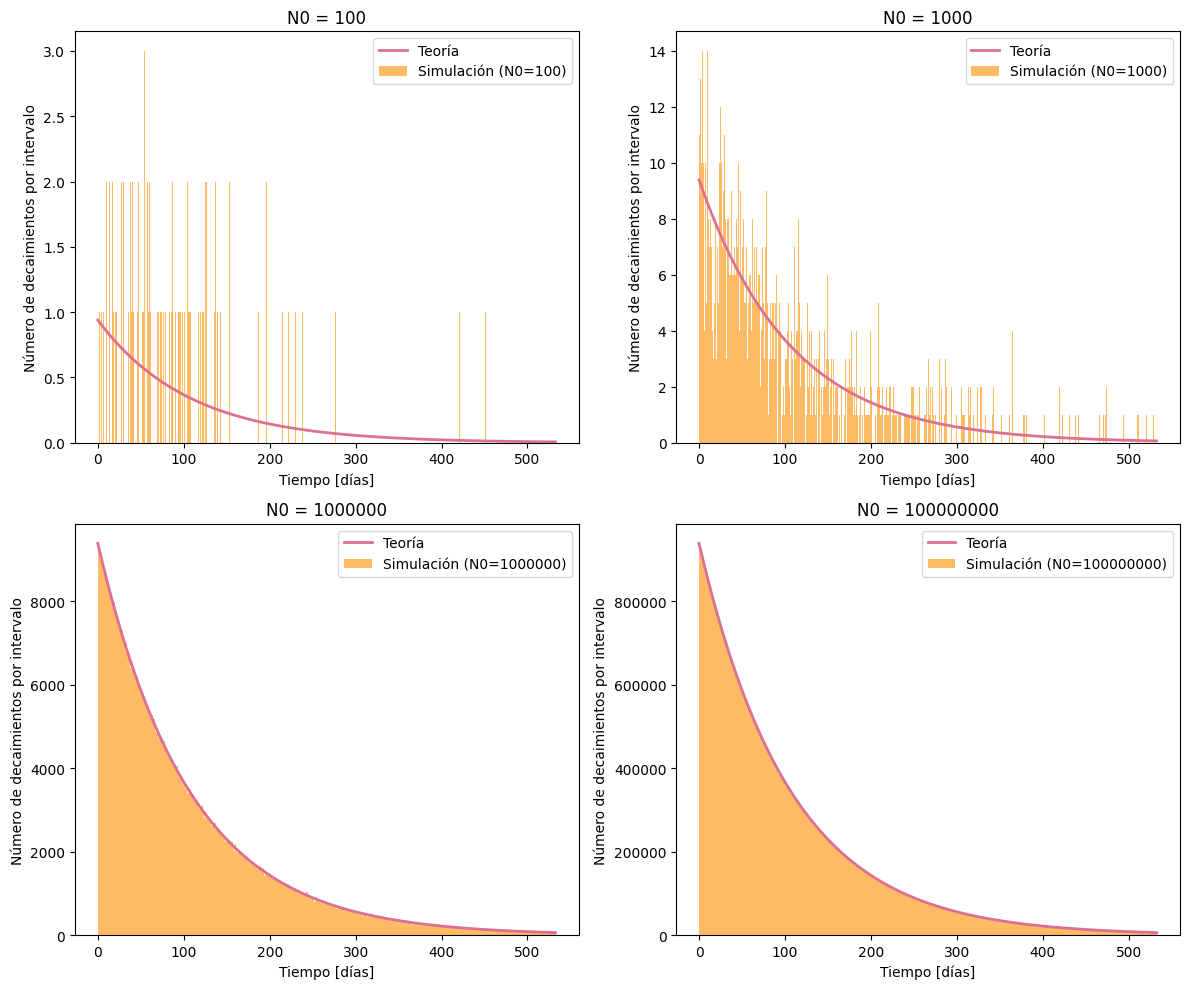

0.009388930465688854 106.50840408866861


In [5]:
T_med = 73.826            # Semivida [días]
Gamma = np.log(2)/T_med   # probabilidad de decaimiento por día [1/días]
tau = 1/Gamma             # Vida media [días]

np.random.seed(123)       # semilla para recrear el comportamiento

dt = 1                    # La toma de datos ocurre en este tiempo, dt debe ser suficientemente menor para que se tome una buena cantidad de datos. Un día comparado con el tau es bueno.
t_f = 5*tau               # después de unas pocas vidas medias (tau), casi todos los núcleos han decaído. En este sentido, se puede considerar alrededor de 4 veces tau.


N_values = [10**2, 10**3, 10**6, 10**8]               # para el punto 7, distinta cantidad de núcleos


fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for idx, N0 in enumerate(N_values):
    u = np.random.rand(N0)                             # Monte Carlo para números aleatorios
    t_decay = -np.log(1-u)/Gamma                       # inversa de la acumulativa para pbtener los tiempos de decaimiento


    bins = np.arange(0, t_f+dt, dt)                    # abarca hasta el último bin
    counts, edges = np.histogram(t_decay, bins=bins)   # cuento cuántos núcleos decayeron en cada intervalo
    centers = 0.5 * (edges[1:] + edges[:-1])           # calcular los centros de los bins para graficar


    t_theory = np.linspace(0, t_f, 100)
    pdf_theory = N0*Gamma * np.exp(-Gamma * t_theory)  # densidad de probabilidad teórica escalada a los datos



    ax = axes[idx]
    ax.bar(centers, counts, width=dt,color='darkorange', alpha=0.6, label="Simulación (N0={})".format(N0))   # se usa dt como ancho del bin
    ax.plot(t_theory, pdf_theory, color='palevioletred', lw=2, label="Teoría")
    ax.set_xlabel("Tiempo [días]")
    ax.set_ylabel("Número de decaimientos por intervalo")
    ax.set_title(f"N0 = {N0}")
    ax.legend()

plt.tight_layout()
plt.show()

print (Gamma, tau)

#Parte II: distribución binomial núcleo por núcleo

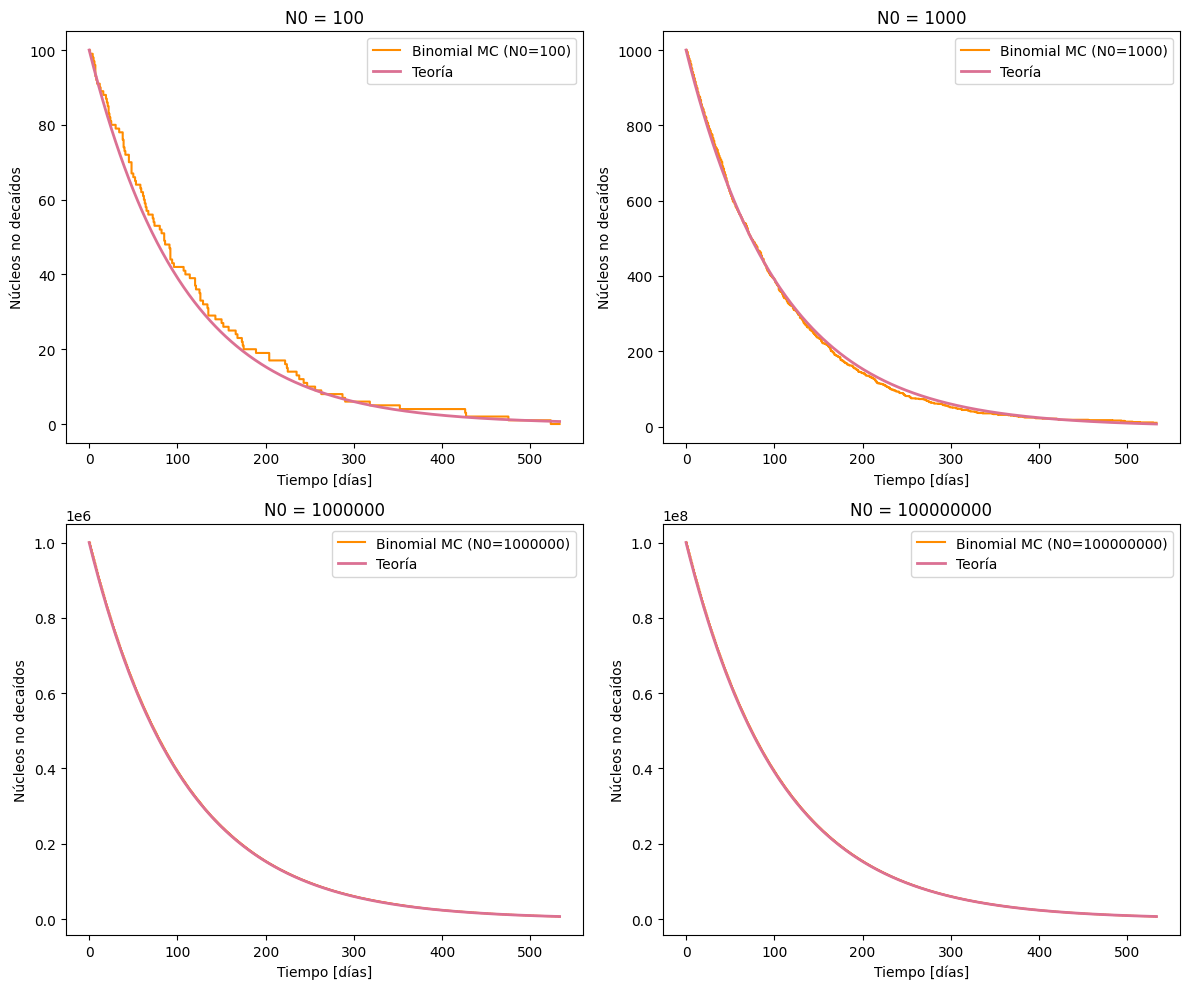

In [ ]:
T_med = 73.826            # semivida [días]
Gamma = np.log(2)/T_med   # probabilidad de decaimiento por día [1/días]
tau = 1/Gamma             # vida media [días]
np.random.seed(123)

dt = 1                    # intervalo de tiempo [días]
t_f = 5*tau               # tiempo total simulado

N_values = [10**2, 10**3, 10**6, 10**8]
t_points = np.arange(0, t_f+dt, dt)      # discretización
p = 1 - np.exp(-Gamma*dt)                # probabilidad de decaer en un paso dt (lo que vemos en el punto 9.)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for idx, N0 in enumerate(N_values):      # recorro cada cantidad de núcleos del arreglo N_values
    N_t = [N0]                           # lista para guardar núcleos vivos (que no decaen), que necesito volver a examinar en t_{i+1}
    N_alive = N0

    for t in t_points[1:]:                          # para cada paso de tiempo
        decays = np.random.binomial(N_alive, p)     # aquí se toma la decisión de cuántos núcleos decaen de los disponibles (N_alive) con prob p
        N_alive -= decays                           # le voy restando a los núcleos vivos, cada vez quedan menos por decaer
        N_t.append(N_alive)                         # guardo la lista de los vivos que quedan


    N_theory = N0 * np.exp(-Gamma * t_points)       # número de núcleos teórica


    ax = axes[idx]
    ax.plot(t_points, N_t, drawstyle="steps-post",
            label=f"Binomial MC (N0={N0})", color="darkorange")
    ax.plot(t_points, N_theory, color="palevioletred", lw=2, label="Teoría")
    ax.set_xlabel("Tiempo [días]")
    ax.set_ylabel("Núcleos no decaídos")
    ax.set_title(f"N0 = {N0}")
    ax.legend()

plt.tight_layout()
plt.show()


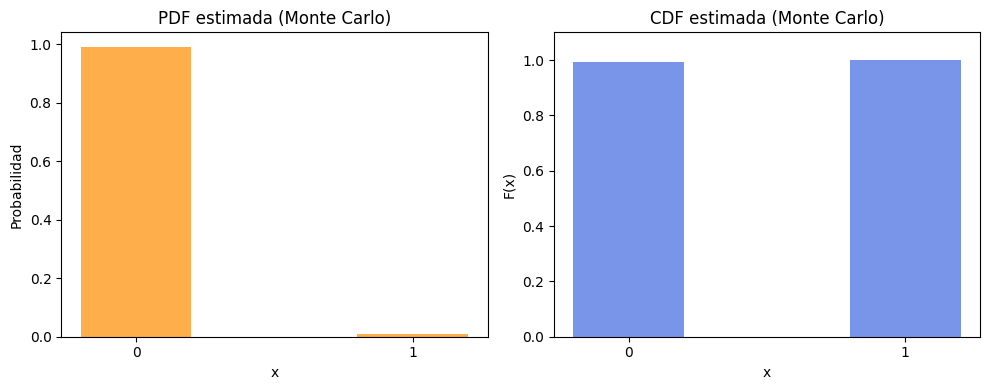

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del núcleo
T_med = 73.826
Gamma = np.log(2)/T_med
dt = 1.0

# Probabilidad de decaer en Δt
p = 1 - np.exp(-Gamma*dt)

# Número de simulaciones Monte Carlo
M = 10000

# Simular N=1 intento muchas veces
# devuelve array de 0 (no decae) o 1 (decae)
samples = np.random.binomial(1, p, size=M)

# Calcular frecuencias relativas
counts, edges = np.histogram(samples, bins=[-0.5,0.5,1.5], density=True)
# CDF: acumulamos
cdf = np.cumsum(counts) / np.sum(counts)

# Graficar PDF (frecuencias) y CDF (acumulativa)
fig, ax = plt.subplots(1,2, figsize=(10,4))

# PDF
ax[0].bar([0,1], counts, width=0.4, color="darkorange", alpha=0.7)
ax[0].set_xticks([0,1])
ax[0].set_xlabel("x")
ax[0].set_ylabel("Probabilidad")
ax[0].set_title("PDF estimada (Monte Carlo)")

# CDF
ax[1].bar([0,1], cdf, width=0.4, color="royalblue", alpha=0.7)
ax[1].set_xticks([0,1])
ax[1].set_xlabel("x")
ax[1].set_ylabel("F(x)")
ax[1].set_title("CDF estimada (Monte Carlo)")
ax[1].set_ylim(0,1.1)

plt.tight_layout()
plt.show()


<>:58: SyntaxWarning: invalid escape sequence '\G'
<>:58: SyntaxWarning: invalid escape sequence '\G'
/tmp/ipython-input-790247462.py:58: SyntaxWarning: invalid escape sequence '\G'
  label='Teoría: $N_0 e^{-\Gamma t}$', linewidth=2)


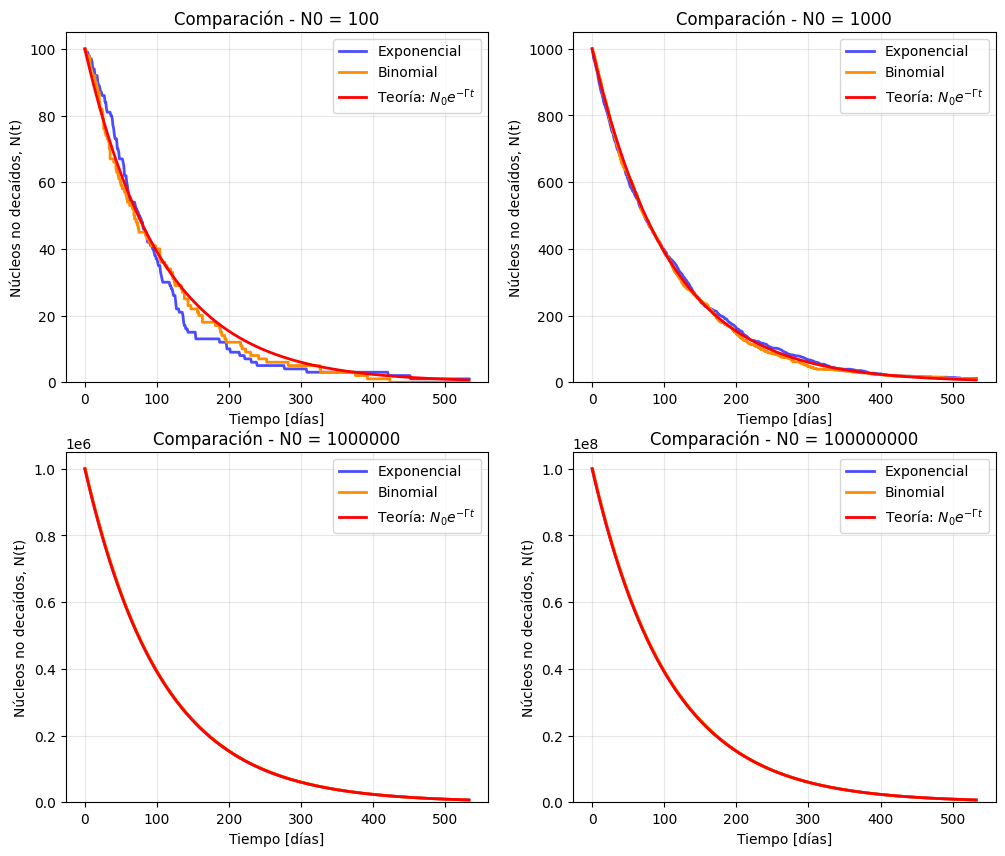

In [14]:
import numpy as np
import matplotlib.pyplot as plt

T_med = 73.826
Gamma = np.log(2)/T_med
tau = 1/Gamma

np.random.seed(123)

dt = 1
t_f = 5*tau
t_points = np.arange(0, t_f+dt, dt)
t_continuous = np.linspace(0, t_f, 500)

# Probabilidad para método binomial (la misma que usaste)
p = 1 - np.exp(-Gamma*dt)

N_values = [10**2, 10**3, 10**6, 10**8]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()


for idx, N0 in enumerate(N_values):
    u = np.random.rand(N0)                             # Monte Carlo para números aleatorios
    t_decay = -np.log(1-u)/Gamma

    #Para la comparación no calculamos los bins, necesitamos calcular los nucleos en funcion del tiempo
    N_t = [N0]
    N_alive = N0

    for t in t_points[1:]:
        N_t.append(np.sum(t_decay > t))
    N_t = np.array(N_t)

    #Binomial
    N_alive = N0
    N_t_binomial = [N0]
    for t in t_points[1:]:
        decays = np.random.binomial(N_alive, p)
        N_alive -= decays
        N_t_binomial.append(N_alive)
    N_t_binomial = np.array(N_t_binomial)

    #Teoria
    N_theory = N0 * np.exp(-Gamma * t_points)
    N_theory_continuous = N0 * np.exp(-Gamma * t_continuous)

    ax = axes[idx]
    ax.plot(t_points, N_t, 'b-', markersize=3, alpha=0.7,
            label='Exponencial', linewidth=2)


    ax.step(t_points, N_t_binomial, where='post', color='darkorange',
            label='Binomial', linewidth=2)

    ax.plot(t_continuous, N_theory_continuous, 'r-',
            label='Teoría: $N_0 e^{-\Gamma t}$', linewidth=2)

    ax.set_xlabel('Tiempo [días]')
    ax.set_ylabel('Núcleos no decaídos, N(t)')
    ax.set_title(f'Comparación - N0 = {N0}')
    ax.legend()
    ax.grid(True, alpha=0.3)
    ax.set_ylim(bottom=0)

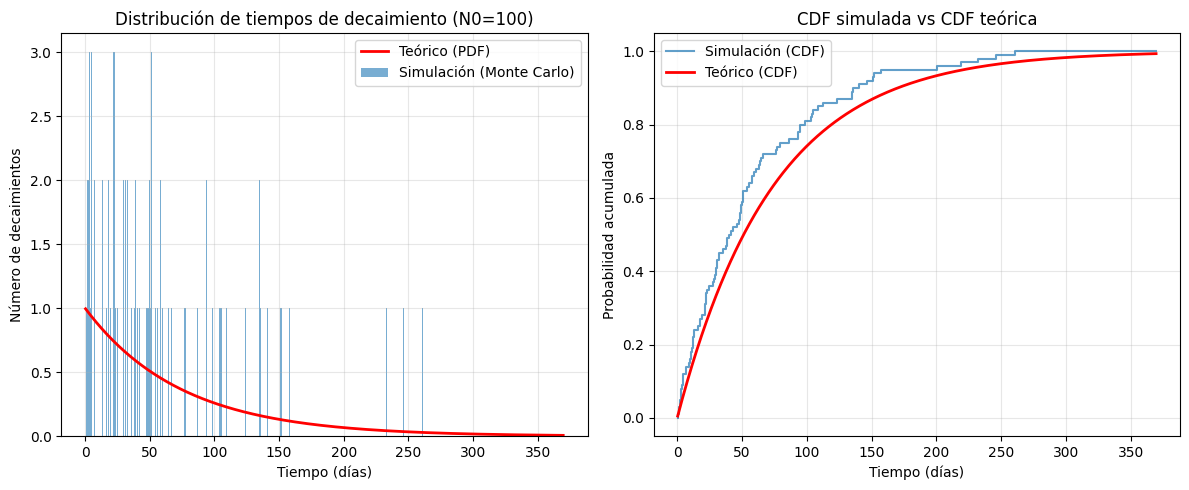

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
tau = 74.0          # en días | Vida media Nucleo ---> Iridio 192
Gamma = 1.0 / tau   # Tasa de decaimiento
N0 = 100            # Cantidad de núcleos
dt = 0.01 * tau
t_final = 5 * tau

# Simulación Monte Carlo
r = np.random.random(N0)
inv = -np.log(1-r)/Gamma

# Histograma para tiempos de decaimiento
bins = np.arange(0, t_final+dt, dt)
hist, bin_edges = np.histogram(inv, bins=bins)
t_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Teórico (PDF)
teo_pdf = N0 * Gamma * np.exp(-Gamma * t_centers) * dt

# Probabilidad acumulada (CDF)
sim_cdf = np.cumsum(hist) / N0
teo_cdf = 1 - np.exp(-Gamma * t_centers)

# Gráficas
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Izquierda: Histograma vs teoría
axs[0].bar(t_centers, hist, width=dt*0.8, alpha=0.6, label="Simulación (Monte Carlo)")
axs[0].plot(t_centers, teo_pdf, "r-", linewidth=2, label="Teórico (PDF)")
axs[0].set_xlabel("Tiempo (días)")
axs[0].set_ylabel("Número de decaimientos")
axs[0].set_title("Distribución de tiempos de decaimiento (N0=100)")
axs[0].legend()
axs[0].grid(alpha=0.3)

# Derecha: CDF simulada vs teórica
axs[1].step(t_centers, sim_cdf, where="mid", label="Simulación (CDF)", alpha=0.7)
axs[1].plot(t_centers, teo_cdf, "r-", linewidth=2, label="Teórico (CDF)")
axs[1].set_xlabel("Tiempo (días)")
axs[1].set_ylabel("Probabilidad acumulada")
axs[1].set_title("CDF simulada vs CDF teórica")
axs[1].legend()
axs[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig("4fcumte.pdf")
